In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read data
df = pd.read_csv('/Users/owlxshri/Desktop/coral reef/mlpr-project/finaldata/coral_genera.csv')

# Preprocess data
df['Genera'] = df['Genera'].str.split(', ')  # Split comma-separated genera
df_exploded = df.explode('Genera')           # Create one row per genus
df_exploded['Genera'] = df_exploded['Genera'].str.strip()  # Clean whitespace

In [6]:
print("Missing values:\n", df_exploded.isnull().sum())
print("\nUnique reef regions:", df_exploded['Reef Region'].unique())
print("Total unique genera:", df_exploded['Genera'].nunique())

Missing values:
 Reef Region    0
Genera         0
dtype: int64

Unique reef regions: ['Gulf of Kachchh' 'Lakshadweep' 'Gulf of Mannar & Palk Bay'
 'Andaman & Nicobar Islands']
Total unique genera: 55


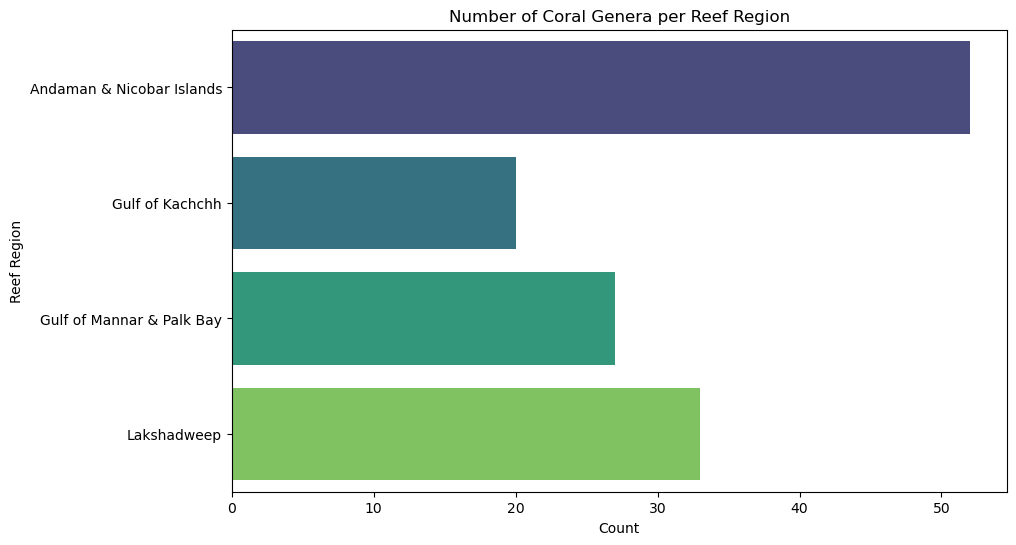

In [7]:
# Genera count per region
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_exploded.groupby('Reef Region')['Genera'].nunique().reset_index(),
    x='Genera', y='Reef Region', palette='viridis'
)
plt.title('Number of Coral Genera per Reef Region')
plt.xlabel('Count')
plt.show()

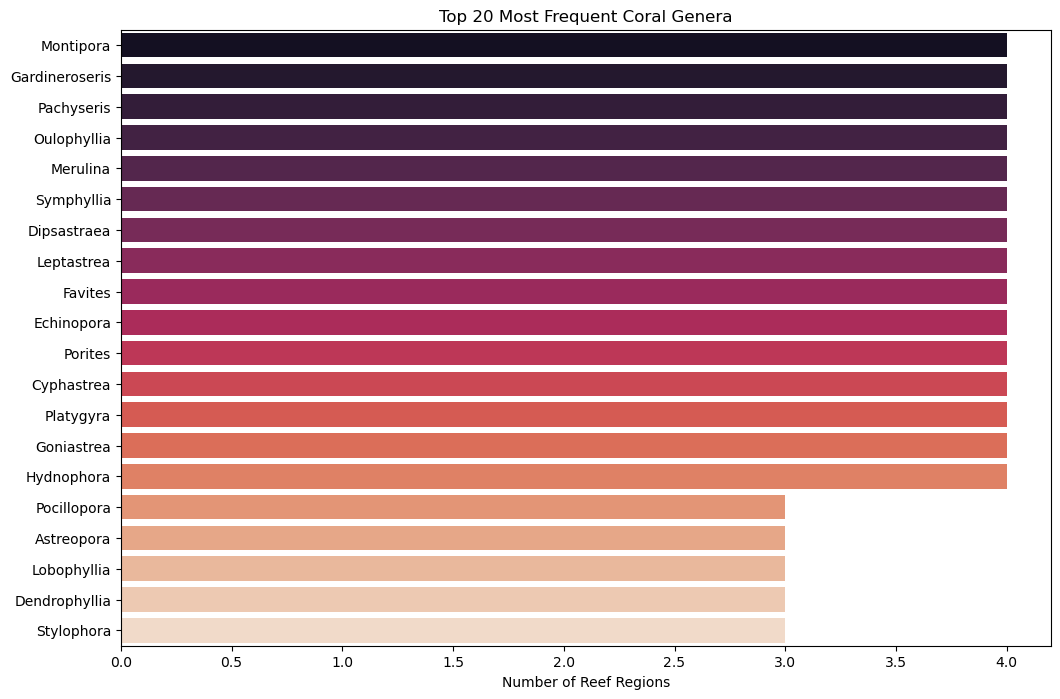

In [8]:
# Top 20 genera across all regions
top_genera = df_exploded['Genera'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genera.values, y=top_genera.index, palette='rocket')
plt.title('Top 20 Most Frequent Coral Genera')
plt.xlabel('Number of Reef Regions')
plt.show()

In [9]:
# Find region-specific genera
unique_genera = df_exploded.groupby('Genera')['Reef Region'].nunique()
region_specific = unique_genera[unique_genera == 1].index.tolist()

print(f"Region-specific genera ({len(region_specific)} total):")
print([g for g in region_specific if not g.startswith(' ')][:5], "...")

Region-specific genera (18 total):
['Cantharellus', 'Caryophyllia', 'Coeloseris mayeri', 'Coscinaria', 'Diploastrea'] ...


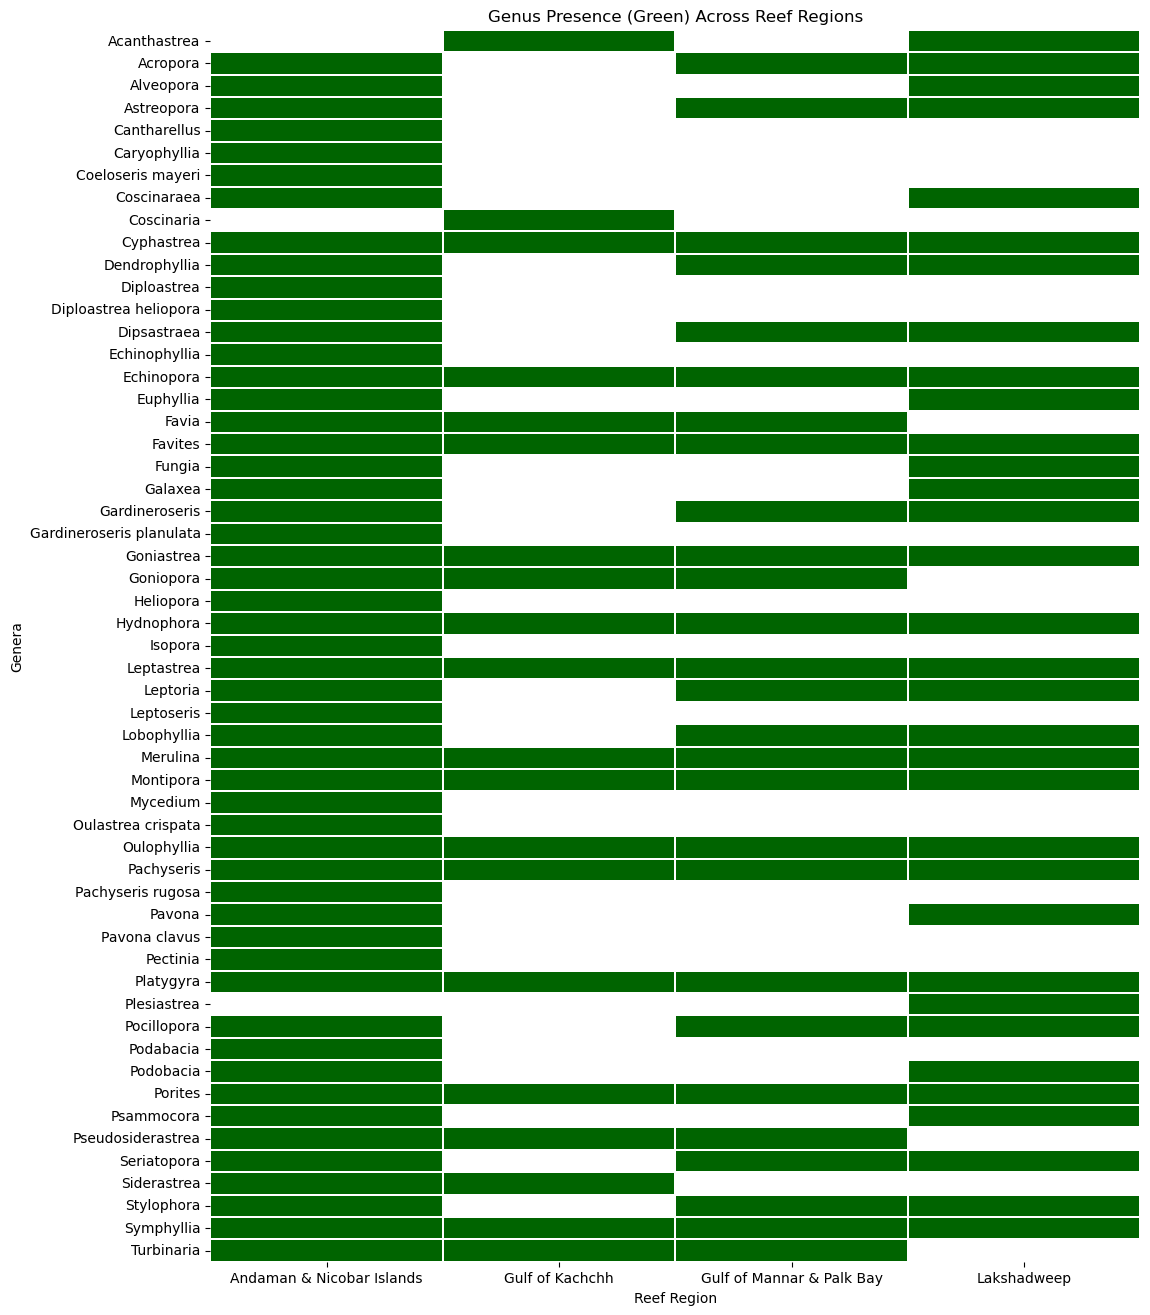

In [10]:
# Create presence/absence matrix
presence_matrix = pd.crosstab(
    df_exploded['Genera'], 
    df_exploded['Reef Region']
)

plt.figure(figsize=(12, 16))
sns.heatmap(
    presence_matrix, 
    cmap=['white', 'darkgreen'], 
    cbar=False, 
    linewidths=0.1
)
plt.title('Genus Presence (Green) Across Reef Regions')
plt.ylabel('Genera')
plt.show()

In [11]:
# Analyze genus name patterns
subspecies = df_exploded[df_exploded['Genera'].str.contains(' ')]
print(f"\nSubspecies/variants ({len(subspecies)}):")
print(subspecies['Genera'].unique())


Subspecies/variants (6):
['Pavona clavus' 'Gardineroseris planulata' 'Pachyseris rugosa'
 'Oulastrea crispata' 'Coeloseris mayeri' 'Diploastrea heliopora']
